In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("df_test.csv")
print(df.head())
print(df.columns)

n = 5380

df_train = df.iloc[:n]
df_test = df.iloc[n:]

         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-09-26  305000.0         2      1         False      76.18046   
1  2014-05-14  498000.0         3      2          True     210.88981   
2  2015-03-23  590000.0         2      4         False     262.91549   
3  2014-07-15  775000.0         3      3         False     159.79316   
4  2015-04-14  350000.0         2      1         False      92.90300   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False               True               1         False   
1      False      False              False               2          True   
2      False      False              False               2          True   
3      False      False              False               1          True   
4      False      False              False               1          True   

   single_floor  month  quartile_zone  
0          True      9              2  
1          True      5        

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     3187.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:39:36   Log-Likelihood:                -72274.
No. Observations:                5380   AIC:                         1.446e+05
Df Residuals:                    5378   BIC:                         1.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.36e+05   6396.220     21.270   

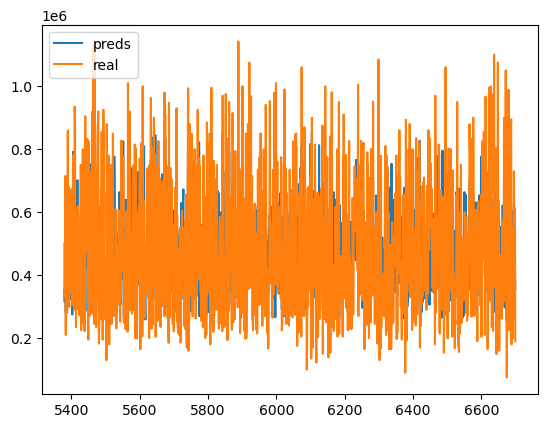

In [3]:
model = smf.ols("price ~ living_in_m2", df_train)
result = model.fit()
print(result.summary())

preds = result.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()

In [ ]:
model_mv = smf.ols("price ~ bedrooms + grade + has_basement + living_in_m2 + renovated + nice_view + perfect_condition + real_bathrooms + has_lavatory + single_floor', 'month', 'quartile_zone'],
      dtype='object", df_train)
result_mv = model_mv.fit()
print(result_mv.summary())

preds = result_mv.predict(df_test)
print(preds)

plt.plot(preds, label = "preds")
plt.plot(df_test["price"], label = "real")
plt.legend()
plt.show()